In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/2025-2026/KHDL/Crawl Data

/content/drive/MyDrive/2025-2026/KHDL/Crawl Data


In [ ]:
!ls

 brands.csv		      encod_data.csv		   normalization_data.csv
 clean_data.csv		     'feature engineering.ipynb'   phone_data.csv
'Clean&&Nomalization.ipynb'   introduce.ipynb		   selected_features.csv


# Đọc file CVS

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("phone_data.csv",  encoding='latin1')
df.head()

,STT,name,brand,price,processor,ram,storage,battery,charging
0,1,Samsung Galaxy A26 5G 6GB/128GB,Samsung,6590000,Exynos 1380 8 nhân,6 GB,128GB,5000 mAh,25 W
1,2,realme C75x 8GB/128GB,realme,4690000,MediaTek Helio G81-Ultra 8 nhân,6 GB,128GB,5600 mAh,45 W
2,3,iPhone 16e 128GB,iPhone,16590000,Apple A18 6 nhân,8 GB,128 GB,26 gi?,20 W
3,4,iPhone 16e 256GB,iPhone,19490000,Apple A18 6 nhân,8 GB,256 GB,26 gi?,20 W
4,5,iPhone 16e 512GB,iPhone,24590000,Apple A18 6 nhân,8 GB,512 GB,26 gi?,20 W


Chọn các cột phù hợp

In [ ]:
selected_columns = ["brand", "ram", "storage", "battery", "charging",  "price"]
df= df[selected_columns]
df.head()

,brand,ram,storage,battery,charging,price
0,Samsung,6 GB,128GB,5000 mAh,25 W,6590000
1,realme,6 GB,128GB,5600 mAh,45 W,4690000
2,iPhone,8 GB,128 GB,26 gi?,20 W,16590000
3,iPhone,8 GB,256 GB,26 gi?,20 W,19490000
4,iPhone,8 GB,512 GB,26 gi?,20 W,24590000


# Clean data

Chuyển đổi đơn vị của ran về cùng loại và cho các giá trị không xác đinh bằng giá trị trung bình

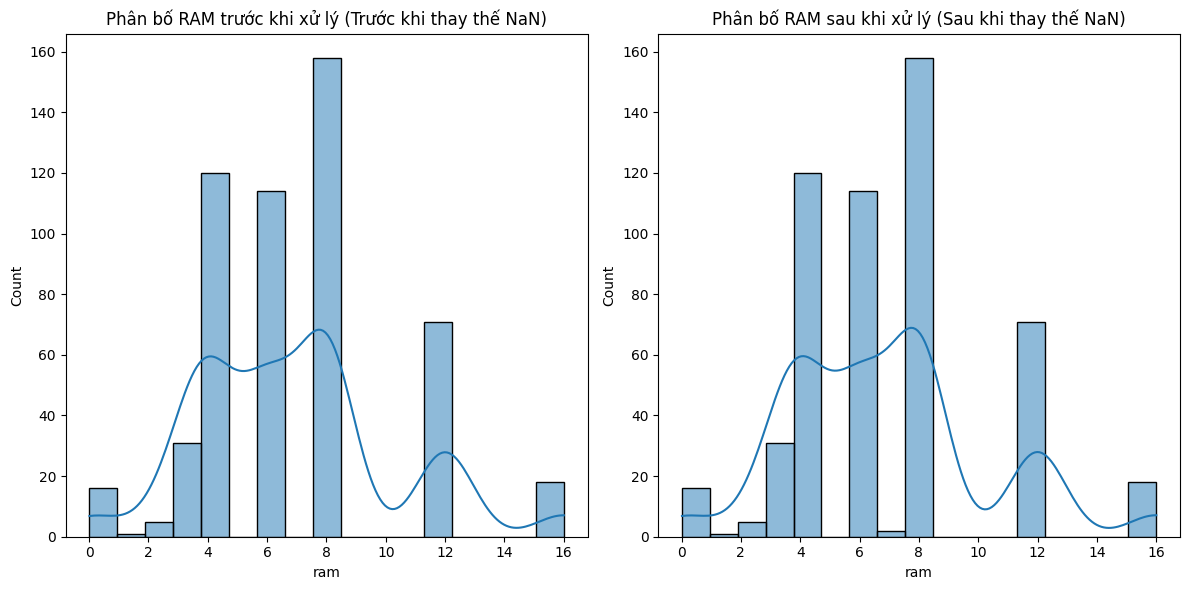

In [ ]:
# Hàm chuẩn hóa RAM (GB hoặc MB -> GB)
def normalize_ram_gb(ram_str):
    if pd.isna(ram_str):
        return np.nan
    ram_str = str(ram_str).strip().upper().replace(' ','')
    value = np.nan
    match = re.search(r'(\d+(\.\d+)?)', ram_str)
    if match:
        numeric_part = float(match.group(1))
        if 'GB' in ram_str:
            value = numeric_part
        elif 'MB' in ram_str:
            value = numeric_part / 1024.0
        else:
            try:
                value = float(ram_str)
            except ValueError:
                value = np.nan
    return value


# Áp dụng hàm chuẩn hóa dữ liệu cho cột 'ram'
df['ram'] = df['ram'].apply(normalize_ram_gb)

# Trước khi thay thế NaN, vẽ histogram
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['ram'], kde=True)
plt.title('Phân bố RAM trước khi xử lý (Trước khi thay thế NaN)')

# Tính giá trị trung bình và thay thế NaN bằng giá trị trung bình
mean_ram = df['ram'].mean()
df['ram'] = df['ram'].fillna(mean_ram)

# Sau khi thay thế NaN, vẽ histogram
plt.subplot(1, 2, 2)
sns.histplot(df['ram'], kde=True)
plt.title('Phân bố RAM sau khi xử lý (Sau khi thay thế NaN)')

plt.tight_layout()
plt.show()


Chuyển Storage (GB/TB -> GB) và đưa các giá trị không xác định bằng giá trị trung bình

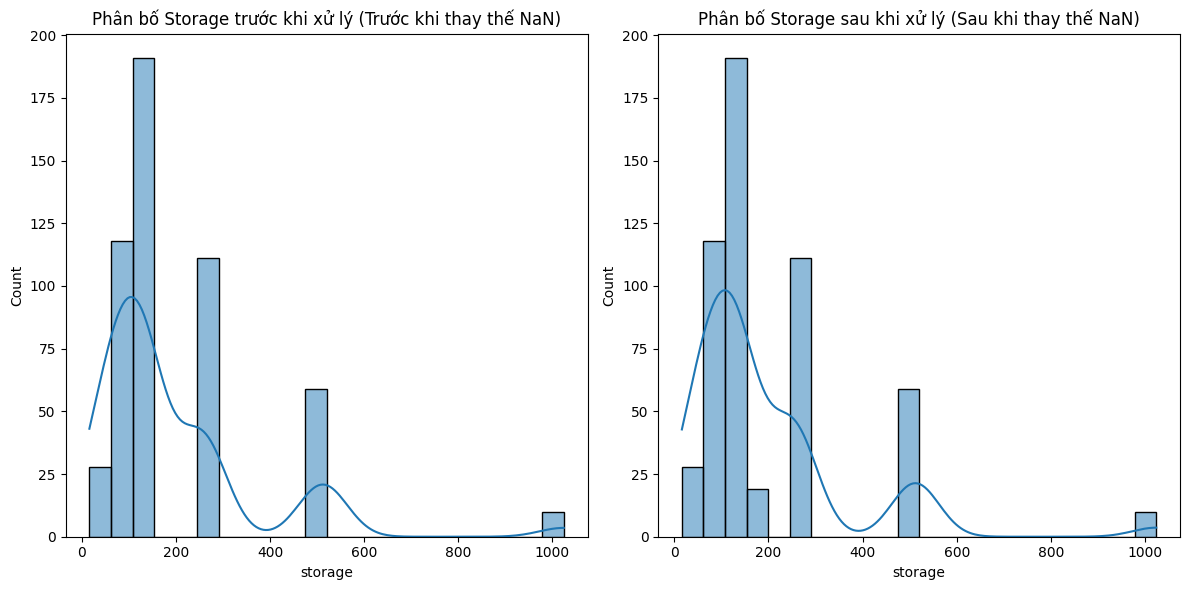

In [ ]:
# Hàm chuẩn hóa Storage (GB/TB -> GB)
def normalize_storage_gb(storage_str):
    if pd.isna(storage_str):
        return np.nan
    storage_str = str(storage_str).strip().upper().replace(' ','')

    value = np.nan

    # Tìm số (có thể là số nguyên hoặc thập phân)
    match = re.search(r'(\d+(\.\d+)?)', storage_str)
    if match:
        numeric_part = float(match.group(1))
        if 'TB' in storage_str:
            value = numeric_part * 1024.0
        elif 'GB' in storage_str:
            value = numeric_part
        else:
            try:
                value = float(storage_str)
            except ValueError:
                value = np.nan
    return value

# Chuẩn hóa cột 'storage'
df['storage'] = df['storage'].apply(normalize_storage_gb)

# Trước khi thay thế NaN, vẽ histogram
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['storage'], kde=True)
plt.title('Phân bố Storage trước khi xử lý (Trước khi thay thế NaN)')

# Tính giá trị trung bình của cột 'storage' (loại bỏ NaN)
mean_storage = df['storage'].mean()
df['storage'] = df['storage'].fillna(mean_storage)

plt.subplot(1, 2, 2)
sns.histplot(df['storage'], kde=True)
plt.title('Phân bố Storage sau khi xử lý (Sau khi thay thế NaN)')

plt.tight_layout()
plt.show()


Chuyển giá trị Charging sang float và thay các giá trị không xác định bằng trung vị

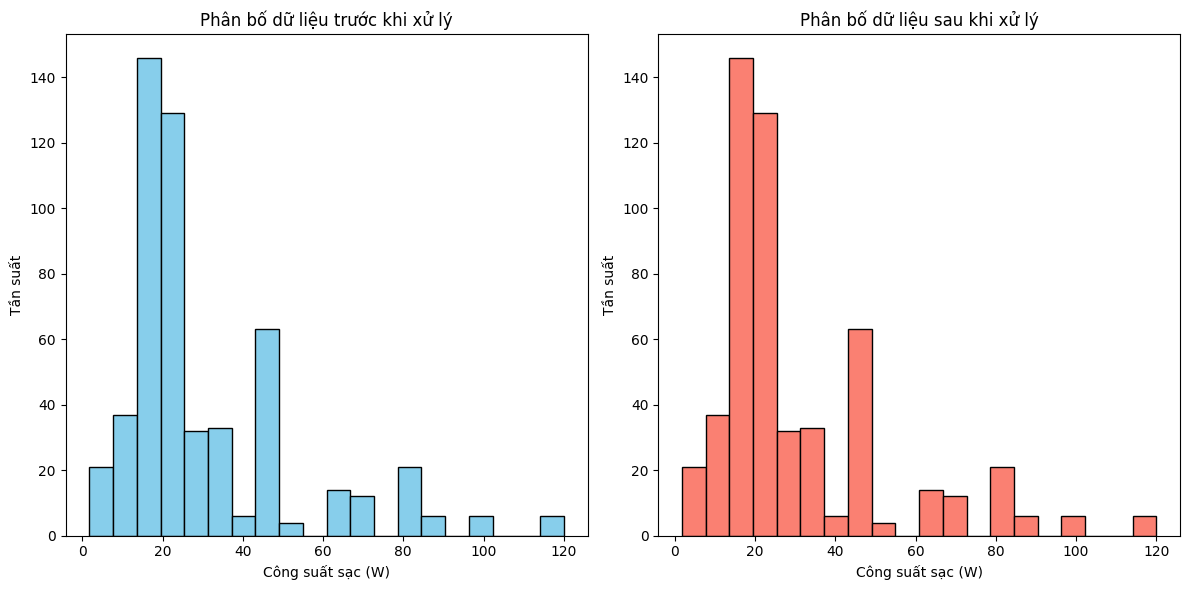

In [ ]:
def clean_charging(x):
    if isinstance(x, str) and 'W' in x:
        # Loại bỏ ký tự 'W' và khoảng trắng (nếu có)
        return float(x.replace(' W', '').replace('W', ''))
    else:
        return np.nan

df['charging'] = df['charging'].apply(clean_charging)


# Vẽ biểu đồ histogram của dữ liệu trước khi xử lý (có thể có NaN)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['charging'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Phân bố dữ liệu trước khi xử lý')
plt.xlabel('Công suất sạc (W)')
plt.ylabel('Tần suất')

# Tính giá trị trung vị của cột 'charging' (loại bỏ NaN)
median_charging = df['charging'].median()
df['charging'] = df['charging'].fillna(median_charging)

# Sau khi xử lý
plt.subplot(1, 2, 2)
plt.hist(df['charging'], bins=20, color='salmon', edgecolor='black')
plt.title('Phân bố dữ liệu sau khi xử lý')
plt.xlabel('Công suất sạc (W)')
plt.ylabel('Tần suất')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


Chuẩn hóa đơn vị của Batterry (mAh/ Giờ -> mAh) và thay thế các giá trị không xác định bằng giá trị trung bình

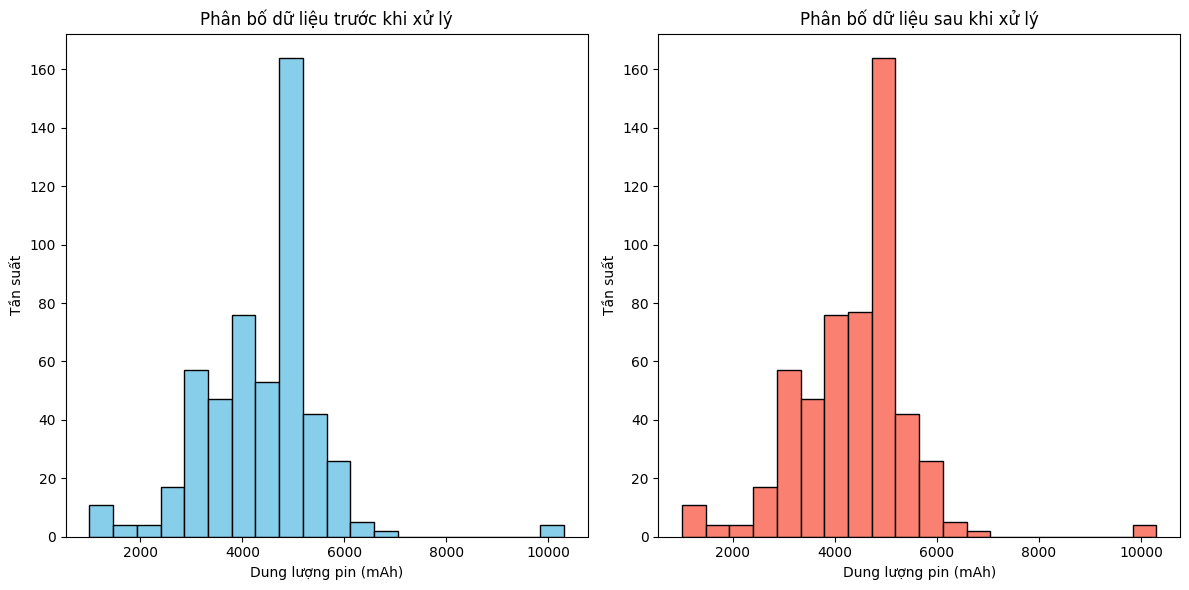

In [ ]:
# Hàm chuyển đổi từ giờ sang mAh
def hours_to_mAh(hours, charging_power):
    voltage = 3.7  # Giả sử điện áp là 3.7V
    return (hours * charging_power * 1000) / voltage

# Hàm chuẩn hóa Battery
def clean_battery(battery, charging_power):
    if battery:
        if 'mAh' in battery:
            # Loại bỏ " mAh" hoặc "mAh" khỏi giá trị
            return float(battery.replace(' mAh', '').replace('mAh', ''))
        elif 'giờ' in battery:
            # Loại bỏ " giờ" và chuyển đổi giá trị sang mAh
            hours = float(battery.replace(' giờ', '').strip())
            return hours_to_mAh(hours, charging_power)
        else:
            return np.nan
    else:
        return np.nan


# Áp dụng hàm chuẩn hóa dữ liệu cho cột 'battery' và tính giá trị từ 'charging'
df['battery'] = df.apply(lambda row: clean_battery(row['battery'], float(str(row['charging']).replace(' W', ''))), axis=1)

# Trước khi xử lý
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['battery'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Phân bố dữ liệu trước khi xử lý')
plt.xlabel('Dung lượng pin (mAh)')
plt.ylabel('Tần suất')

# Thay thế các giá trị NaN trong cột 'battery' bằng giá trị trung vị
median_battery = df['battery'].median()
df['battery'] = df['battery'].fillna(median_battery)

# Sau khi xử lý
plt.subplot(1, 2, 2)
plt.hist(df['battery'], bins=20, color='salmon', edgecolor='black')
plt.title('Phân bố dữ liệu sau khi xử lý')
plt.xlabel('Dung lượng pin (mAh)')
plt.ylabel('Tần suất')


plt.tight_layout()
plt.show()


Chuyển các giá trị Price thành float và loại bỏ các mẫu không chứa giá trị

In [ ]:
# Hàm làm sạch giá trị 'price'
def clean_price(value):
    if isinstance(value, str):
        try:
            return float(value.replace(',', ''))
        except ValueError:
            return np.nan
    return value


df['price'] = df['price'].apply(clean_price)

df= df.dropna(subset=['price'])


# Dữ liệu sau khi làm sạch


In [ ]:
print(df)

       brand  ram  storage  battery  charging       price
0    Samsung  6.0    128.0   5000.0      25.0   6590000.0
1     realme  6.0    128.0   5600.0      45.0   4690000.0
2     iPhone  8.0    128.0   4500.0      20.0  16590000.0
3     iPhone  8.0    256.0   4500.0      20.0  19490000.0
4     iPhone  8.0    512.0   4500.0      20.0  24590000.0
..       ...  ...      ...      ...       ...         ...
531  Ulefone  8.0    128.0   5500.0      18.0   9990000.0
532   Bluboo  3.0     32.0   3000.0      10.0   3990000.0
533   HomTom  3.0     32.0   4000.0      10.0   4490000.0
534   Doogee  1.0     16.0   3000.0       5.0   2490000.0
535  Ulefone  2.0     16.0   3500.0       5.0   2490000.0

[531 rows x 6 columns]


# Lưu dữ liệu sau khi làm sạch

In [ ]:
df.to_csv('clean_data.csv')

# Chuẩn hóa dữ liệu theo Min-Max Scaling

In [ ]:
df = pd.read_csv("clean_data.csv",  encoding='latin1')
selected_columns = ["brand", "ram", "storage", "battery", "charging",  "price"]
df= df[selected_columns]
df.head()

,brand,ram,storage,battery,charging,price
0,Samsung,6.0,128.0,5000.0,25.0,6590000.0
1,realme,6.0,128.0,5600.0,45.0,4690000.0
2,iPhone,8.0,128.0,4500.0,20.0,16590000.0
3,iPhone,8.0,256.0,4500.0,20.0,19490000.0
4,iPhone,8.0,512.0,4500.0,20.0,24590000.0


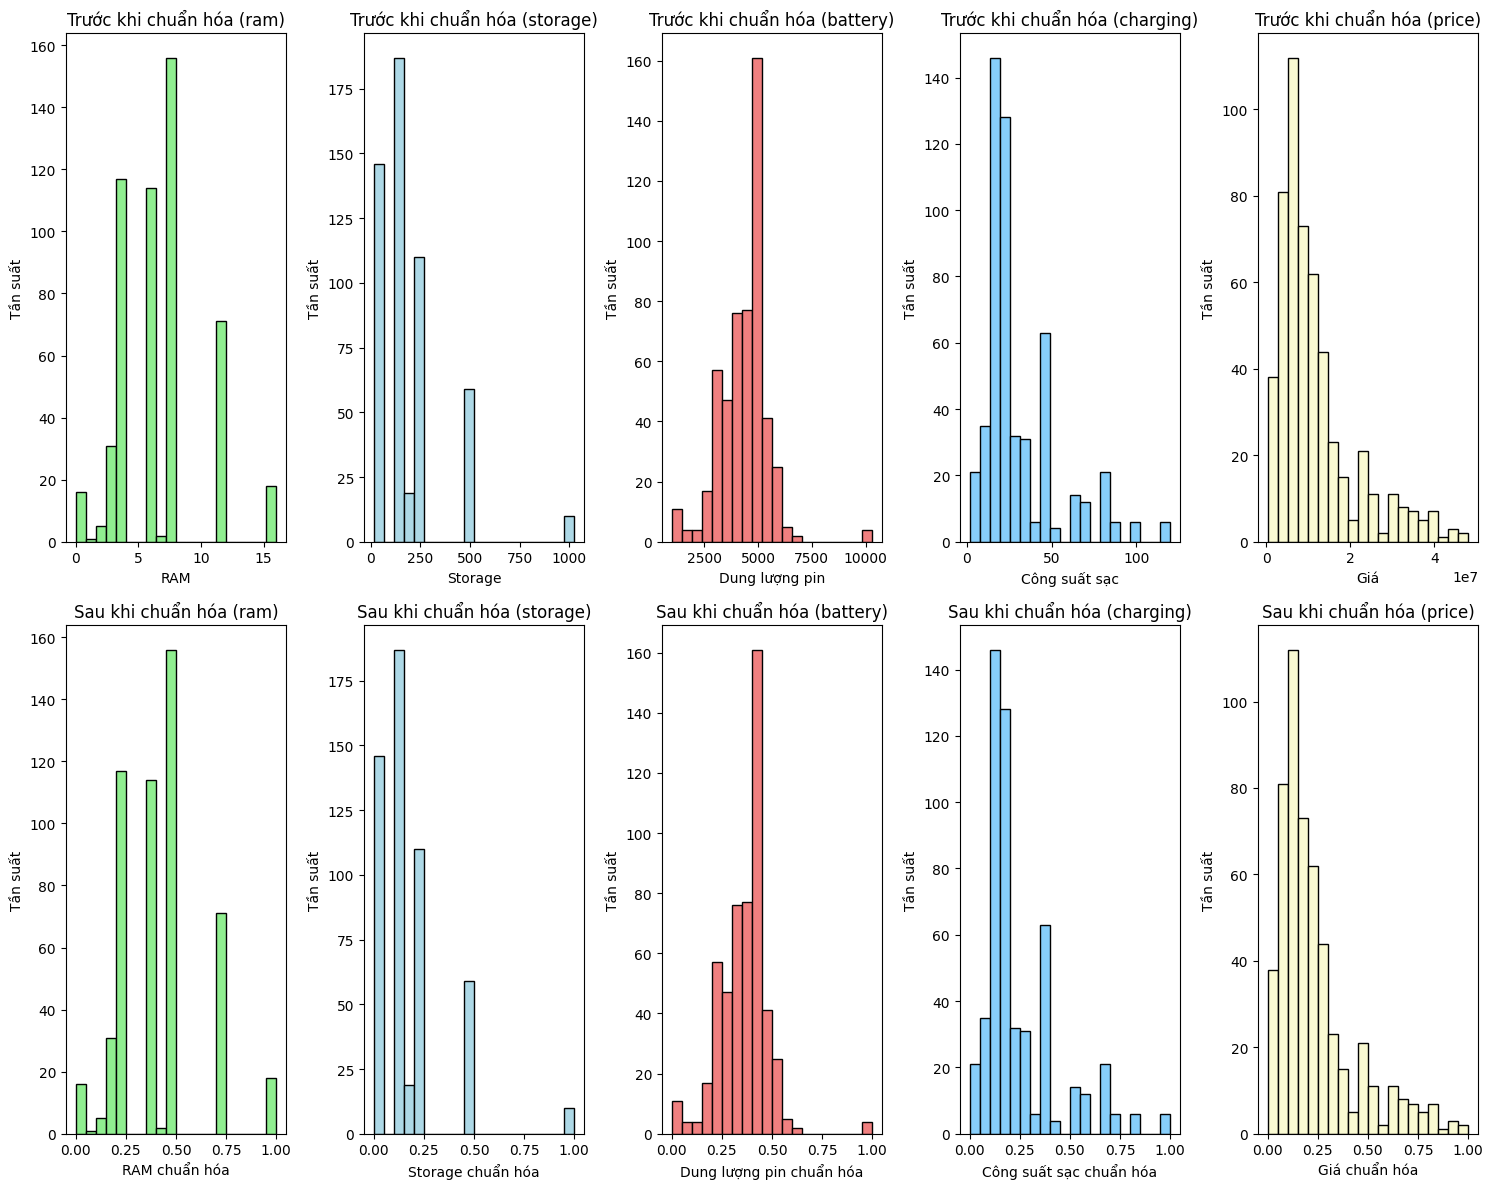

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

scaler_minmax = MinMaxScaler()
df_original = df.copy()
df[['ram', 'storage', 'battery', 'charging', 'price']] = scaler_minmax.fit_transform(df[['ram', 'storage', 'battery', 'charging', 'price']])


plt.figure(figsize=(15, 12))

# Trước khi chuẩn hóa
plt.subplot(2, 5, 1)
plt.hist(df_original['ram'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Trước khi chuẩn hóa (ram)')
plt.xlabel('RAM')
plt.ylabel('Tần suất')

plt.subplot(2, 5, 2)
plt.hist(df_original['storage'], bins=20, color='lightblue', edgecolor='black')
plt.title('Trước khi chuẩn hóa (storage)')
plt.xlabel('Storage')
plt.ylabel('Tần suất')

plt.subplot(2, 5, 3)
plt.hist(df_original['battery'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Trước khi chuẩn hóa (battery)')
plt.xlabel('Dung lượng pin')
plt.ylabel('Tần suất')

plt.subplot(2, 5, 4)
plt.hist(df_original['charging'], bins=20, color='lightskyblue', edgecolor='black')
plt.title('Trước khi chuẩn hóa (charging)')
plt.xlabel('Công suất sạc')
plt.ylabel('Tần suất')

plt.subplot(2, 5, 5)
plt.hist(df_original['price'], bins=20, color='lightgoldenrodyellow', edgecolor='black')
plt.title('Trước khi chuẩn hóa (price)')
plt.xlabel('Giá')
plt.ylabel('Tần suất')

# Sau khi chuẩn hóa
plt.subplot(2, 5, 6)
plt.hist(df['ram'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Sau khi chuẩn hóa (ram)')
plt.xlabel('RAM chuẩn hóa')
plt.ylabel('Tần suất')

plt.subplot(2, 5, 7)
plt.hist(df['storage'], bins=20, color='lightblue', edgecolor='black')
plt.title('Sau khi chuẩn hóa (storage)')
plt.xlabel('Storage chuẩn hóa')
plt.ylabel('Tần suất')

plt.subplot(2, 5, 8)
plt.hist(df['battery'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Sau khi chuẩn hóa (battery)')
plt.xlabel('Dung lượng pin chuẩn hóa')
plt.ylabel('Tần suất')

plt.subplot(2, 5, 9)
plt.hist(df['charging'], bins=20, color='lightskyblue', edgecolor='black')
plt.title('Sau khi chuẩn hóa (charging)')
plt.xlabel('Công suất sạc chuẩn hóa')
plt.ylabel('Tần suất')

plt.subplot(2, 5, 10)
plt.hist(df['price'], bins=20, color='lightgoldenrodyellow', edgecolor='black')
plt.title('Sau khi chuẩn hóa (price)')
plt.xlabel('Giá chuẩn hóa')
plt.ylabel('Tần suất')

plt.tight_layout()
plt.show()


In [ ]:
df.to_csv('normalization_data.csv')

# Label Encodding

In [ ]:
df = pd.read_csv("normalization_data.csv",  encoding='latin1')
selected_columns = ["brand", "ram", "storage", "battery", "charging",  "price"]
df= df[selected_columns]
df.head()

,brand,ram,storage,battery,charging,price
0,Samsung,0.374389,0.111111,0.430108,0.196617,0.130435
1,realme,0.374389,0.111111,0.494624,0.365751,0.090527
2,iPhone,0.499511,0.111111,0.376344,0.154334,0.340475
3,iPhone,0.499511,0.238095,0.376344,0.154334,0.401386
4,iPhone,0.499511,0.492063,0.376344,0.154334,0.508507


Các brand được sắp xếp theo giá trị sản phẩm thấp nhất của mỗi brand

In [ ]:
min_price_per_brand = df.groupby("brand")["price"].min().reset_index()
sorted_brands = min_price_per_brand.sort_values(by="price", ascending=False)
list_brand = sorted_brands.iloc[:, 0].to_list()
print(list_brand)

['Honor', 'Asus', 'iPhone', 'Huawei', 'LG', 'Sony', 'OnePlus', 'Google', 'Blackview', 'Micromax', 'Infinix', 'Motorola', 'Cubot', 'Lenovo', 'ZTE', 'HTC', 'Oppo', 'Realme', 'Vivo', 'Oukitel', 'HomTom', 'Lava', 'Alcatel', 'Leagoo', 'Karbonn', 'Bluboo', 'OPPO', 'Samsung', 'vivo', 'Doogee', 'Ulefone', 'realme', 'HONOR', 'Tecno', 'TCL', 'Xiaomi', 'Nokia', 'Viettel', 'Itel', 'Mobell', 'Masstel', 'Benco']


In [ ]:
df['brand'] = [list_brand.index(br) for br in df['brand']]

print(df['brand'])


0      27
1      31
2       2
3       2
4       2
       ..
526    30
527    25
528    20
529    29
530    30
Name: brand, Length: 531, dtype: int64


# Lưu trữ danh mục thương hiệu

In [ ]:
brands_df = pd.DataFrame(list(list_brand), columns=['brand'])
brands_df.to_csv('brands.csv')

# Lưu trữ dữ liệu sau khi chuẩn hóa và encoding thương hiệu

In [ ]:
print(df)

     brand       ram   storage   battery  charging     price
0       27  0.374389  0.111111  0.430108  0.196617  0.130435
1       31  0.374389  0.111111  0.494624  0.365751  0.090527
2        2  0.499511  0.111111  0.376344  0.154334  0.340475
3        2  0.499511  0.238095  0.376344  0.154334  0.401386
4        2  0.499511  0.492063  0.376344  0.154334  0.508507
..     ...       ...       ...       ...       ...       ...
526     30  0.499511  0.111111  0.483871  0.137421  0.201848
527     25  0.186706  0.015873  0.215054  0.069767  0.075824
528     20  0.186706  0.015873  0.322581  0.069767  0.086326
529     29  0.061584  0.000000  0.215054  0.027484  0.044318
530     30  0.124145  0.000000  0.268817  0.027484  0.044318

[531 rows x 6 columns]


In [ ]:
df.to_csv('encod_data.csv')